# 休斯顿房价
http://www.cnblogs.com/wxshi/p/7764501.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/cal_housing.csv')
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200


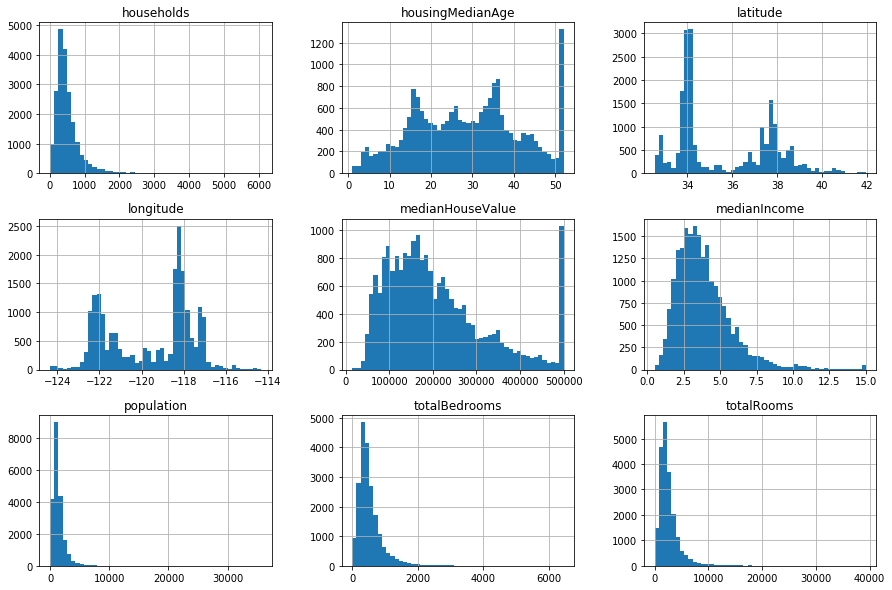

In [3]:
df.hist(bins=50,figsize=(15,10))#bins 柱子个数
#plt.savefig('a.jpg')  #保存图片
plt.show()

In [4]:
x_all = df.drop(['medianHouseValue'],axis=1)
y_all = df['medianHouseValue']
train_set,test_set = train_test_split(df,random_state=42,test_size=0.2)

In [5]:
print("train set len",len(train_set))
print("test set len",len(test_set))

train set len 16512
test set len 4128


In [6]:
df["income_cat"] = np.ceil(df["medianIncome"] / 1.5)
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,income_cat
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,6.0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,6.0
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,5.0
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,4.0
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,3.0


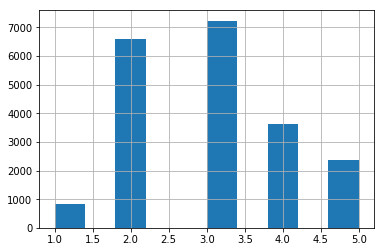

In [7]:
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)
df["income_cat"].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [10]:
strat_train_set.drop(['income_cat'],axis=1,inplace=True)
housing = strat_train_set.copy()

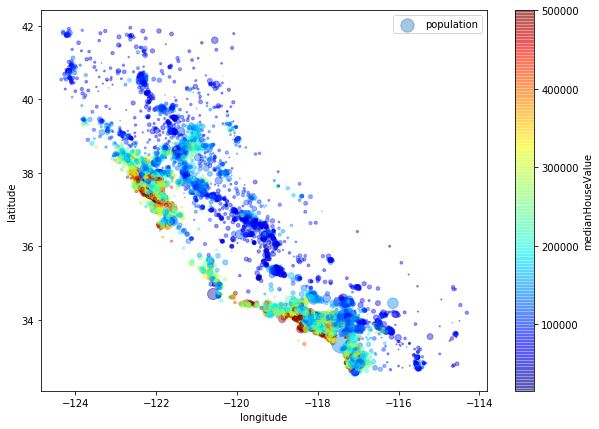

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="medianHouseValue", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [12]:
corr_matrix = housing.corr()

In [13]:
print(corr_matrix['medianHouseValue'].sort_values(ascending=False))

medianHouseValue    1.000000
medianIncome        0.687160
totalRooms          0.135097
housingMedianAge    0.114110
households          0.064506
totalBedrooms       0.048494
population         -0.026920
longitude          -0.047432
latitude           -0.142724
Name: medianHouseValue, dtype: float64


In [14]:
from pandas.tools.plotting import scatter_matrix

/Users/zhangdi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21406ef0>,
      dtype=object)

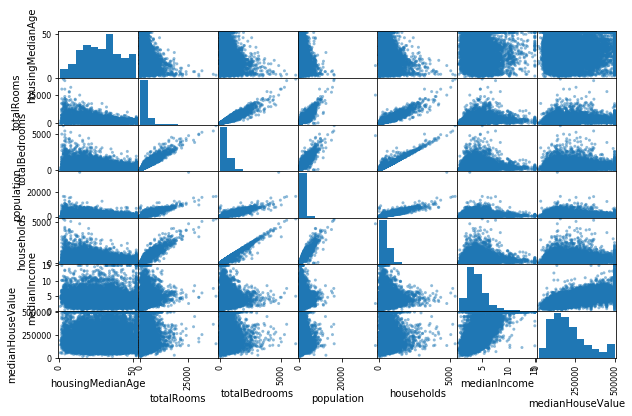

In [19]:
attribute = ['housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue']
scatter_matrix(housing[attribute],figsize=(10,6))

In [22]:
housing["rooms_per_household"] = housing["totalRooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["totalBedrooms"]/housing["totalRooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
print(corr_matrix["medianHouseValue"].sort_values(ascending=False))

medianHouseValue            1.000000
medianIncome                0.687160
rooms_per_household         0.146285
totalRooms                  0.135097
housingMedianAge            0.114110
households                  0.064506
totalBedrooms               0.048494
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259965
Name: medianHouseValue, dtype: float64
